# Cyber Incidents Master.


Este dataset contiene información sobre incidentes de ciberseguridad, enfocándose en detalles sobre ataques que afectaron a diversas industrias, países y regiones

## Importación de librerías.

In [342]:
# === Librerías estándar de Python ===
import os
import numpy as np
import re

# === Librerías de análisis de datos y visualización ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Librerías de preprocesamiento de datos ===
from sklearn.preprocessing import LabelEncoder
from urllib.parse import urlparse

# === Librerías para aprendizaje supervisado ===
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# === Librerías para métricas de evaluación ===
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    precision_score,
    recall_score,
)

# === Librerías para aprendizaje no supervisado ===
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# === Librerías para balanceo de datos ===
from imblearn.over_sampling import RandomOverSampler

# === Librerías adicionales ===
from tabulate import tabulate

# === Configuración de colores ===
denexus_colors = ['#1B2D40', '#577596', '#C7262B', '#F85C37', '#FF8250', '#4A4A4A']
denexus_palette = sns.light_palette("#1B2D40", n_colors=100, as_cmap=True)

# Ajustar configuraciones de Pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## Importacion e informacion del dataframe.

In [343]:
df = pd.read_csv('data/CYBER INCIDENTS MASTER.csv', index_col=0)
df

,description,date,year,target_country,region,dnx_country,industry,dnx_industry,victim,type_of_attack,threat_source,malware,impact,tisafe_score,references,source_database,source_database_incident_id,date_uploaded
dnx_id,,,,,,,,,,,,,,,,,,
inc_knb_4282,['Cyber attack on a labor union in the United ...,2024-03-01 00:00:00,2024,[],[],[],[],[],[],[],[],[],[],[],[{'title': 'Tech trade union confirms cyberatt...,KONBRIEFING,[],2024-04-29
inc_knb_4193,['Cyber attack on a university in the United K...,2024-02-20 00:00:00,2024,[],[],[],[],[],[],[],[],[],[],[],[{'title': 'Cyber incident disrupts another UK...,KONBRIEFING,[],2024-04-29
inc_knb_4154,['DDoS attack on the website of the Ukrainian ...,2024-02-07 00:00:00,2024,[],[],[],[],[],[],[],[],[],[],[],[{'title': 'Сайт МОН не працює внаслідок росій...,KONBRIEFING,[],2024-04-29
inc_knb_4104,['Cyber attack on a emergency service in Canad...,2024-01-24 00:00:00,2024,[],[],[],[],[],[],[],[],[],[],[],[{'title': 'Des pirates s’en prennent aux serv...,KONBRIEFING,[],2024-04-29
inc_knb_4035,['Cyber attack on a it service provider in Ger...,2024-01-01 00:00:00,2024,[],[],[],[],[],[],[],[],[],[],[],[{'title': 'Straubinger Firma bestätigt: Handw...,KONBRIEFING,[],2024-04-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
inc_hmg_10629,Researchers from Cado Labs discover an updated...,2023-05-24 00:00:00,2023,[],[],[],Multiple Industries,[],Multiple organizations,Malware,?,[],[],[],https://thehackernews.com/2023/05/legion-malwa...,HACKMAGEDDON,[],2024-04-29
inc_hmg_10722,Researchers from Aqua Security reveal that the...,2023-11-03 00:00:00,2023,[],[],[],Multiple Industries,[],Multiple organizations,Vulnerability,Kinsing AKA Money Libra,[],[],[],https://www.bleepingcomputer.com/news/security...,HACKMAGEDDON,[],2024-04-29
inc_hmg_11019,Hampton-Newport News CSB is added to ALPHV/Bla...,2023-11-25 00:00:00,2023,US,[],US,Information and communication,[],Hampton-Newport News CSB,Malware,ALPHV a.k.a. BlackCat,[],[],[],https://www.databreaches.net/the-big-bad-black...,HACKMAGEDDON,[],2024-04-29


In [344]:
df.describe(include='all')

,description,date,year,target_country,region,dnx_country,industry,dnx_industry,victim,type_of_attack,threat_source,malware,impact,tisafe_score,references,source_database,source_database_incident_id,date_uploaded
count,34993,34993,34993.000000,34987,34993,34993,34993,34993,34993,34993,34993,34993,34993,34993,34993,34993,34993,34993
unique,32754,3918,NaN,1181,134,960,587,80,22629,174,2542,121,1176,8,29914,6,17328,2
top,[nan],2023-05-31 00:00:00,NaN,[],[],['US'],[],[],[],[],[],[],[],[],[],CISSM,[],2024-04-29
freq,239,444,NaN,8015,32086,8072,4472,19272,7082,20196,22306,33515,32658,33736,543,13423,16365,21570
mean,NaN,NaN,2014.608693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,108.983085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2020.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2022.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2023.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [345]:
df.shape

(34993, 18)

In [346]:
df.dtypes

description                    object
date                           object
year                            int64
target_country                 object
region                         object
dnx_country                    object
industry                       object
dnx_industry                   object
victim                         object
type_of_attack                 object
threat_source                  object
malware                        object
impact                         object
tisafe_score                   object
references                     object
source_database                object
source_database_incident_id    object
date_uploaded                  object
dtype: object

In [347]:
df.columns

Index(['description', 'date', 'year', 'target_country', 'region',
       'dnx_country', 'industry', 'dnx_industry', 'victim', 'type_of_attack',
       'threat_source', 'malware', 'impact', 'tisafe_score', 'references',
       'source_database', 'source_database_incident_id', 'date_uploaded'],
      dtype='object')

A continuación, se incluye una breve explicación sobre la información que aporta cada columna.
1. **Description**: Descripción del incidente.
2. **Date**: Fecha en la que ocurrió el incidente (formato YYYY-MM-DD HH:MM:SS).
3. **Year**: Año en el que ocurrió el incidente.
4. **Target Country**: El país o países que fueron el objetivo del ataque o incidente. Es el lugar donde ocurrió el impacto principal.
5. **Region**: Región geográfica del país objetivo.
6. **Dnx Country**: El país o países relacionados con el incidente que no fueron el objetivo principal, pero que de alguna manera estuvieron involucrados, directa o indirectamente.
7. **Industry**: Industria o sector afectado por el ataque cibernético.
8. **Dnx Industry**: La industria de los países que no fueron el objetivo directo del ataque pero que estuvieron involucrados en el incidente.
9. **Victim**: Identificación o nombre de la víctima del ataque.
10. **Type of Attack**: Tipo de ataque realizado (ej. DDoS, ransomware).
11. **Threat Source**: Fuente o entidad responsable del ataque, si es conocida.
12. **Malware**: Tipo de malware utilizado en el ataque, si aplica.
13. **Impact**: Descripción del impacto del ataque.
14. **Tisafe Score**: Puntaje de evaluación de la seguridad de la víctima.
15. **References**: Referencias o enlaces sobre el incidente.
16. **Source Database**: Nombre de la base de datos de origen de la información.
17. **Source Database Incident ID**: Identificación del incidente en la base de datos de origen.
18. **Date uploaded**: Fecha en que se cargó la información del incidente.
19. **Dnx ID**: Identificador único del incidente en el sistema. Key value.


In [348]:
df.head(3)

,description,date,year,target_country,region,dnx_country,industry,dnx_industry,victim,type_of_attack,threat_source,malware,impact,tisafe_score,references,source_database,source_database_incident_id,date_uploaded
dnx_id,,,,,,,,,,,,,,,,,,
inc_knb_4282,['Cyber attack on a labor union in the United ...,2024-03-01 00:00:00,2024,[],[],[],[],[],[],[],[],[],[],[],[{'title': 'Tech trade union confirms cyberatt...,KONBRIEFING,[],2024-04-29
inc_knb_4193,['Cyber attack on a university in the United K...,2024-02-20 00:00:00,2024,[],[],[],[],[],[],[],[],[],[],[],[{'title': 'Cyber incident disrupts another UK...,KONBRIEFING,[],2024-04-29
inc_knb_4154,['DDoS attack on the website of the Ukrainian ...,2024-02-07 00:00:00,2024,[],[],[],[],[],[],[],[],[],[],[],[{'title': 'Сайт МОН не працює внаслідок росій...,KONBRIEFING,[],2024-04-29


# Limpieza del dataset

In [349]:
df.drop(['date_uploaded'], axis=1, inplace=True)

### Manejo de filas duplicadas.
En caso de haber filas duplicadas, deberemos de eliminar estas para que no afecten al análisis posterior.

In [350]:
df.duplicated().sum() # Columnas duplicadas

86

In [351]:
df.drop_duplicates(inplace = True)

In [352]:
df.shape

(34907, 17)

### Manejo de filas nulos.

In [353]:
df.isnull().sum() # Valores nulos

description                    0
date                           0
year                           0
target_country                 6
region                         0
dnx_country                    0
industry                       0
dnx_industry                   0
victim                         0
type_of_attack                 0
threat_source                  0
malware                        0
impact                         0
tisafe_score                   0
references                     0
source_database                0
source_database_incident_id    0
dtype: int64

In [354]:
df.dropna(inplace = True)

Al examinar detenidamente el DataFrame, notamos que hay algunas columnas que no están marcadas como valores nulos, pero que contienen el texto `'[]'`, lo que indica que son valores vacíos o que se desconoce. Es necesario revisar estas filas para determinar cómo manejarlas.

In [355]:
df.shape[0]

34901

In [356]:
(df == '[]').sum()

description                       35
date                             102
year                               0
target_country                  7986
region                         31996
dnx_country                     7986
industry                        4445
dnx_industry                   19229
victim                          7006
type_of_attack                 20123
threat_source                  22229
malware                        33424
impact                         32615
tisafe_score                   33644
references                       472
source_database                    0
source_database_incident_id    16328
dtype: int64

Para las columnas que tengan en su totalidad valores nulos, serán eliminadas. La columna **Malware** se mantendrá en el DataFrame, a pesar de que algunos registros contengan listas vacías `[]`, porque su información es fundamental para el análisis de ciberseguridad. Aunque las listas vacías indican que no se detectó ningún tipo de malware en esos casos, la presencia de esta columna sigue siendo relevante para entender la naturaleza de los ataques.




In [357]:
df.drop(['tisafe_score', 'region', 'impact'], axis = 1, inplace = True)

In [358]:
df.shape

(34901, 14)

A continuación eliminaremos las filas que no contangan la información ni del nombre de la victima ni el tipo de industria al que pertenecen debido a que no aportarán información relevante al estudio.

In [359]:
df.drop(df[(df['industry'] == '[]') & (df['victim'] == '[]')].index, inplace=True)

In [360]:
(df == '[]').sum()

description                        1
date                              80
year                               0
target_country                  3584
dnx_country                     3584
industry                          41
dnx_industry                   14825
victim                          2602
type_of_attack                 15719
threat_source                  17825
malware                        29021
references                       285
source_database                    0
source_database_incident_id    11926
dtype: int64

In [361]:
df.shape

(30497, 14)

A continuación, las pocas filas que contengan listas vacías las eliminaremos debido a que estas no aportan información relevante para el análisis. 

In [362]:
for i in ['description', 'date', 'industry', 'references']:
    df.drop(df[df[i].apply(lambda x: x == '[]')].index, inplace=True)

In [363]:
df.shape

(27777, 14)

#### Tratamiento de listas vacias.
Hay veces que la entidad responsable del ataque no es conocida. Esta información es valiosa por tanto no podemos eliminar la columna. Al igual que en el caso de Malware, hay veces que no se aplica uno. Por ello, reemplazaremos estos valores por: **Unknown**. Al igual que con DNX Industry, ya que si no se sabe 

In [364]:
(df == '[]').sum()

description                        0
date                               0
year                               0
target_country                  2852
dnx_country                     2852
industry                           0
dnx_industry                   12338
victim                          2381
type_of_attack                 15447
threat_source                  17473
malware                        26331
references                         0
source_database                    0
source_database_incident_id     9590
dtype: int64

In [365]:
for i in ['malware', 'threat_source', 'dnx_industry', 'type_of_attack', 'victim', 'source_database_incident_id']:
    df.replace({i: '[]'}, 'Unknown', inplace=True)

In [366]:
df.replace(to_replace='[]', value=np.nan, inplace=True)

In [367]:
df.shape

(27777, 14)

In [368]:
df.isnull().sum()

description                       0
date                              0
year                              0
target_country                 2852
dnx_country                    2852
industry                          0
dnx_industry                      0
victim                            0
type_of_attack                    0
threat_source                     0
malware                           0
references                        0
source_database                   0
source_database_incident_id       0
dtype: int64

In [369]:
df.dropna(subset=['target_country', 'dnx_country'], inplace=True)

In [370]:
df.shape

(24925, 14)

### **Limpieza de listas.**
En el DataFrame, hemos observado que existen valores que están encapsulados en listas. Para facilitar el análisis y manipulación de estos datos, procederemos a eliminar los caracteres asociados a estas listas. Esto incluye la eliminación de corchetes y comillas que pueden interferir con el procesamiento posterior.

Este paso es crucial para asegurar que los valores sean tratados como cadenas simples, lo que permitirá una mejor interpretación y análisis de la información.

In [371]:
df = df.applymap(lambda x: x.replace("[", "").replace("]", "").replace("'", "") if isinstance(x, str) else x)

### **Comparación de fechas**.

Notamos que hay una columna que ya proporciona el año y otra columna llamada **Date** que incluye la fecha completa. Compararemos ambas para verificar si los años coinciden y asegurar que la información es consistente.

In [372]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

df['year_1'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [373]:
# Filtrar las filas donde year y year_1 son diferentes
diferencias = df[df['year'] != df['year_1']]

print(f"Hay {diferencias.shape[0]} fila donde 'year' y 'year_1' son diferentes.")
diferencias[['year', 'year_1']].head()

Hay 0 fila donde 'year' y 'year_1' son diferentes.


,year,year_1
dnx_id,,


In [374]:
df.drop(['date', 'year_1'], axis=1, inplace=True)

### Selección de variables categóricas y continuas.

In [375]:
v_continuas = []
v_categoricas = []
for i in df.columns:
    if len(df[i].unique()) > 120 or df[i].dtype in ['float64', 'int64']:
        v_continuas.append(i)
    else:
        v_categoricas.append(i)

print('Variables continuas: {}'.format(', '.join(v_continuas)))
print('Variables categóricas: {}'.format(', '.join(v_categoricas)))

Variables continuas: description, year, target_country, dnx_country, industry, victim, threat_source, references, source_database_incident_id, month, day
Variables categóricas: dnx_industry, type_of_attack, malware, source_database


#### Tratamiento de variables categoricas.

In [376]:
df[v_categoricas]

,dnx_industry,type_of_attack,malware,source_database
dnx_id,,,,
inc_iccs_364,Transportation,Unknown,Unknown,ICSSTRIVE
inc_iccs_419,Manufacturing,Unknown,Unknown,ICSSTRIVE
inc_iccs_618,Transportation,Unknown,Unknown,ICSSTRIVE
inc_iccs_728,Water and Waste Water,Unknown,Unknown,ICSSTRIVE
inc_cis_13410,Manufacturing,Unknown,Unknown,CISSM
...,...,...,...,...
inc_hmg_10610,Unknown,Malware,Unknown,HACKMAGEDDON
inc_hmg_10616,Unknown,Unknown,Unknown,HACKMAGEDDON
inc_hmg_11019,Unknown,Malware,Unknown,HACKMAGEDDON


In [377]:
df[v_categoricas].describe(include='all')

,dnx_industry,type_of_attack,malware,source_database
count,24925,24925,24925,24925
unique,77,96,117,5
top,Unknown,Unknown,Unknown,CISSM
freq,9495,17306,23487,13401


##### **Source Database.**


In [378]:
df['source_database'].unique()

array(['ICSSTRIVE', 'CISSM', 'TISAFE', 'EuRepoC', 'HACKMAGEDDON'],
      dtype=object)

In [379]:
encoder = LabelEncoder()
source_database_codes = encoder.fit_transform(df['source_database'])

El siguiente comando es para colocar la nueva fila pegada a la columna de **Source Database** por comodidad.

In [380]:
df.insert(df.columns.get_loc('source_database') + 1, 'source_database_code', source_database_codes)
df.head(2)

,description,year,target_country,dnx_country,industry,dnx_industry,victim,type_of_attack,threat_source,malware,references,source_database,source_database_code,source_database_incident_id,month,day
dnx_id,,,,,,,,,,,,,,,,
inc_iccs_364,"Uber, the ride-hailing and food delivery compa...",2022,United States,US,"Transportation (Includes Logistics, Shipping, ...",Transportation,Uber,Unknown,Lapsus$,Unknown,https://www.bleepingcomputer.com/news/security...,ICSSTRIVE,3,https://icsstrive.com/incident/uber-hit-in-cyb...,9,12
inc_iccs_419,Ransomware attack has paralyzed the global gro...,2022,Austria,AT,Manufacturing,Manufacturing,EGLO,Unknown,Unknown,Unknown,https://www.diepresse.com/6167688/tiroler-leuc...,ICSSTRIVE,3,https://icsstrive.com/incident/hackers-paralyz...,7,18


##### **DNX Industry.**

In [381]:
df['dnx_industry'].unique()

array(['Transportation', 'Manufacturing', 'Water and Waste Water',
       'Services', 'Education', 'Government', 'Finance and Insurance',
       'Information Technology', 'Healthcare', 'Entertrainment',
       'Energy (Includes Power and Utilities)', 'nan', 'Unknown',
       'Healthcare ', 'Real State', 'Mining', 'Construction',
       'Wholesale and retail', 'Critical Infrastructure', 'Communication',
       'Manufacturing, Water and Waste Water', 'Others',
       'Information Technology, Transportation', 'Agriculture',
       'Government, Transportation',
       'Chemical, Manufacturing, Manufacturing',
       'Government, Water and Waste Water', 'Services, Transportation',
       'Food & Beverage', 'Services, Government',
       'Manufacturing, Energy (Includes Power and Utilities)',
       'Energy (Includes Power and Utilities), Water and Waste Water',
       'Manufacturing, Information Technology',
       'Healthcare , Healthcare ', 'Automotive',
       'Automotive, Manufacturing,

Como hay celdas en las que se repite el texto, a través del siguiente comando se juntará en uno.

In [382]:
df['dnx_industry'] = df['dnx_industry'].apply(lambda x: ', '.join(sorted(set(x.split(', ')))) if isinstance(x, str) else x)

In [383]:
df['dnx_industry'] = df['dnx_industry'].str.strip() # Eliminar espacios en blanco al principio y al final de la cadena

In [384]:
sorted(set(action for sublist in df['dnx_industry'].str.split(', ') for action in sublist)) # Para ver las categorias unicas.

['Agriculture',
 'Automotive',
 'Chemical',
 'Communication',
 'Construction',
 'Critical Infrastructure',
 'Defense',
 'Education',
 'Energy (Includes Power and Utilities)',
 'Entertainment',
 'Entertrainment',
 'Finance and Insurance',
 'Food & Beverage',
 'Government',
 'Healthcare',
 'Healthcare ',
 'Information Technology',
 'Manufacturing',
 'Mining',
 'Others',
 'Real State',
 'Services',
 'Tecnology Information',
 'Transportation',
 'Unknown',
 'Water and Waste Water',
 'Wholesale and retail',
 'nan']

In [385]:
sector_group = {
    'Agriculture': ['Agriculture', 'Food & Beverage'],
    'Automotive': ['Automotive', 'Transportation'],
    'Chemical': ['Chemical', 'Mining'],
    'Technology': ['Communication', 'Information Technology', 'Tecnology Information'],
    'Construction': ['Construction', 'Real State', 'Critical Infrastructure'],
    'Defense': ['Defense', 'Government'],
    'Healthcare': ['Education', 'Healthcare', 'Healthcare '],
    'Energy': ['Energy (Includes Power and Utilities)', 'Water and Waste Water'],
    'Entertainment': ['Entertainment', 'Entertrainment'],
    'Finance': ['Finance and Insurance', 'Wholesale and retail'],
    'Manufacturing': ['Manufacturing', 'Others'],
    'Services': ['Services'],
    'Unknown': ['Unknown', 'nan']
}

In [386]:
def industry_mapping(action):
    categories = set()
    for individual_action in action.split(', '):
        for category, actions in sector_group.items():
            if individual_action in actions:
                categories.add(category)
    return ', '.join(categories) if categories else None

In [387]:
df['dnx_industry_grouped'] = df['dnx_industry'].apply(industry_mapping)

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.



In [388]:
columns = df.columns.tolist()
index = columns.index('dnx_industry')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [389]:
df['dnx_industry_grouped'].isnull().sum()

0

In [390]:
df.dropna(subset=['dnx_industry_grouped'], inplace=True)

Para incluir la columna **DNX Industries** en el modelo de Machine Learning, aplicaremos **OneHotEncoder**. Esta técnica convierte las industrias en columnas binarias, asignando `1` si un registro pertenece a una industria y `0` en caso contrario. Así, se manejan múltiples industrias sin perder información, facilitando que el modelo procese los datos correctamente y capture relaciones relevantes con la variable objetivo.

In [391]:
df_dummies = df['dnx_industry_grouped'].str.get_dummies(sep=', ').add_prefix('dnx_industry_')
df = pd.concat([df, df_dummies], axis=1)

In [392]:
df.head(2)

,description,year,target_country,dnx_country,industry,dnx_industry,dnx_industry_grouped,victim,type_of_attack,threat_source,malware,references,source_database,source_database_code,source_database_incident_id,month,day,dnx_industry_Agriculture,dnx_industry_Automotive,dnx_industry_Chemical,dnx_industry_Construction,dnx_industry_Defense,dnx_industry_Energy,dnx_industry_Entertainment,dnx_industry_Finance,dnx_industry_Healthcare,dnx_industry_Manufacturing,dnx_industry_Services,dnx_industry_Technology,dnx_industry_Unknown
dnx_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
inc_iccs_364,"Uber, the ride-hailing and food delivery compa...",2022,United States,US,"Transportation (Includes Logistics, Shipping, ...",Transportation,Automotive,Uber,Unknown,Lapsus$,Unknown,https://www.bleepingcomputer.com/news/security...,ICSSTRIVE,3,https://icsstrive.com/incident/uber-hit-in-cyb...,9,12,0,1,0,0,0,0,0,0,0,0,0,0,0
inc_iccs_419,Ransomware attack has paralyzed the global gro...,2022,Austria,AT,Manufacturing,Manufacturing,Manufacturing,EGLO,Unknown,Unknown,Unknown,https://www.diepresse.com/6167688/tiroler-leuc...,ICSSTRIVE,3,https://icsstrive.com/incident/hackers-paralyz...,7,18,0,0,0,0,0,0,0,0,0,1,0,0,0


##### **Type of Attack**

In [393]:
df['type_of_attack'].unique()

array(['Unknown', 'Disruption',
       'Hijacking with Misuse, Data theft & Doxing',
       'Ransomware, Hijacking with Misuse, Data theft & Doxing',
       'Hijacking with Misuse, Disruption', 'Disruption, Ransomware',
       'Data theft', 'Data theft, Hijacking with Misuse',
       'Data theft & Doxing', 'Misconfiguration', 'Malware',
       'Account Takeover', 'Targeted Attack', 'DDoS', 'Vulnerability',
       'Coordinated Inauthentic Behavior', 'Hijacking with Misuse',
       'Hijacking with Misuse, Disruption, Ransomware',
       'Hijacking without Misuse', 'Fake Social Accounts',
       'Data theft, Hijacking with Misuse, Disruption, Ransomware',
       'Malicious Browser Extension', 'Business Email Compromise',
       'Cyber Crime', 'Data theft, Hijacking with Misuse, Disruption',
       'Malicious Script Injection',
       'Not available, Hijacking without Misuse',
       'Disruption, Data theft & Doxing', 'Compromised certificate',
       'SQLi',
       'Ransomware, Hijacking 

In [394]:
df['type_of_attack'].nunique()

96

Como hay celdas en las que se repite el texto, a través del siguiente comando se juntará en uno.

In [395]:
df['type_of_attack'] = df['type_of_attack'].apply(lambda x: ', '.join(sorted(set(x.split(', ')))) if isinstance(x, str) else x)

In [396]:
df['type_of_attack'] = df['type_of_attack'].str.strip() # Eliminar espacios en blanco al principio y al final de la cadena

In [397]:
sorted(set(action for sublist in df['type_of_attack'].str.split(', ') for action in sublist)) # Para ver las categorias unicas.

['>1',
 'API Hijacking',
 'ATM skimming',
 'Account Takeover',
 'Advertising fraud',
 'BGP hijack',
 'Brute-Force',
 'Brute-force',
 'Business Email Compromise',
 'CVE-2023-34362 Vulnerability',
 'Compromised Private Keys',
 'Compromised certificate',
 'Coordinated Inauthentic Behavior',
 'Coordinated inauthentic behavior',
 'Credential Stuffing',
 'Credential stuffing',
 'Credential-stuffing',
 'Crypto Scam',
 'Cyber Crime',
 'Cyber Espionage',
 'Cyber Warfare',
 'DDoS',
 'DNS Hijacking',
 'DNS hijacking',
 'Data theft',
 'Data theft & Doxing',
 'Deepfake',
 'Defacement',
 'Disruption',
 'Fake Social Accounts',
 'Fake Websites',
 'GPS Spoofing',
 'Hacktivism',
 'Hijacking with Misuse',
 'Hijacking without Misuse',
 'Inadvertent leak',
 'Malicious Browser Extension',
 'Malicious Google search ads',
 'Malicious Script Injection',
 'Malicious Script injection',
 'Malicious Spam',
 'Malicious bot',
 'Malicious script injection',
 'Malicious spam',
 'Malverposting',
 'Malvertising',
 'Malw

In [398]:
attack_group = {
    'Hijacking': ['Account Takeover', 'API Hijacking', 'SIM swap', 'BGP hijack', 
                  'DNS Hijacking', 'DNS hijacking', 'Hijacking with Misuse', 'Hijacking without Misuse'],
    'Fraud': ['Advertising fraud', 'Malvertising', 'Crypto Scam', 'Robo-calls', 
              'Malicious Google search ads', 'Scam', 'Sextortion'],
    'Bruteforce': ['Brute-Force', 'Brute-force', 'Password sprying', 'Password-Spraying/Credential Stuffing',
                   'Credential Stuffing', 'Credential stuffing', 'Credential-stuffing'],
    'Malware': ['Malware', 'Ransomware', 'Malicious Spam', 'Malicious spam', 'Malicious bot', 
                'Malicious Browser Extension', 'Malicious Script Injection', 'Malicious Script injection'],
    'Espionage': ['Cyber Espionage', 'Cyber Warfare', 'Hacktivism', 'Targeted Attack', 'Cyber Crime'],
    'Leaks': ['Data theft', 'Data theft & Doxing', 'Inadvertent leak'],
    'Disruption': ['DDoS', 'Defacement', 'Disruption'],
    'Vulnerability': ['Misconfiguration', 'Vulnerability', 'CVE-2023-34362 Vulnerability',
                      'Compromised certificate', 'Compromised Private Keys', 'Reentrancy attack'],
    'Social': ['Deepfake', 'Fake Social Accounts', 'Fake Websites', 
               'Coordinated Inauthentic Behavior', 'Coordinated inauthentic behavior', 
               'Business Email Compromise'],
    'Physical': ['ATM skimming', 'Wind River Systems', 'Windows Bit locker', 'VHF Interference', 'GPS Spoofing'],
    'Scripting': ['SQLi', 'Scripting attack', 'Malicious Script Injection'],
    'WateringHole': ['Watering Hole'],
    'MitM': ['MitM'],
    'Zoom': ['Zoom Bombing', 'Zoom bombing', 'Zoombombing'],
    'Unknown': ['Not available', 'Unknown'],
    'Other': ['>1']
}

In [399]:
def attack_mapping(action):
    categories = set()
    for individual_action in action.split(', '):
        for category, actions in attack_group.items():
            if individual_action in actions:
                categories.add(category)
    return ', '.join(categories) if categories else None

In [400]:
df['type_of_attack_grouped'] = df['type_of_attack'].apply(attack_mapping)

In [401]:
df[df['type_of_attack_grouped'].isnull()]['type_of_attack'].unique() # Valores no mapeados.

array(['Malicious script injection', 'Malverposting'], dtype=object)

In [402]:
df['type_of_attack_grouped'].isnull().sum()

2

In [403]:
df.dropna(subset=['type_of_attack_grouped'], inplace=True)

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.



In [404]:
columns = df.columns.tolist()
index = columns.index('type_of_attack')
columns.insert(index + 1, columns.pop())
df = df[columns]

Para incluir la columna **Type of Attack** en el modelo de Machine Learning, aplicaremos **OneHotEncoder**. Esta técnica convierte el tipo de ataque en columnas binarias, asignando `1` si un registro que pertenece y `0` en caso contrario. Así, se manejan múltiples tipos de ataques sin perder información, facilitando que el modelo procese los datos correctamente y capture relaciones relevantes con la variable objetivo.

In [405]:
df_dummies = df['type_of_attack_grouped'].str.get_dummies(sep=', ').add_prefix('type_of_attack_')
df = pd.concat([df, df_dummies], axis=1)

In [406]:
df.head(2)

,description,year,target_country,dnx_country,industry,dnx_industry,dnx_industry_grouped,victim,type_of_attack,type_of_attack_grouped,threat_source,malware,references,source_database,source_database_code,source_database_incident_id,month,day,dnx_industry_Agriculture,dnx_industry_Automotive,dnx_industry_Chemical,dnx_industry_Construction,dnx_industry_Defense,dnx_industry_Energy,dnx_industry_Entertainment,dnx_industry_Finance,dnx_industry_Healthcare,dnx_industry_Manufacturing,dnx_industry_Services,dnx_industry_Technology,dnx_industry_Unknown,type_of_attack_Bruteforce,type_of_attack_Disruption,type_of_attack_Espionage,type_of_attack_Fraud,type_of_attack_Hijacking,type_of_attack_Leaks,type_of_attack_Malware,type_of_attack_MitM,type_of_attack_Other,type_of_attack_Physical,type_of_attack_Scripting,type_of_attack_Social,type_of_attack_Unknown,type_of_attack_Vulnerability,type_of_attack_WateringHole,type_of_attack_Zoom
dnx_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
inc_iccs_364,"Uber, the ride-hailing and food delivery compa...",2022,United States,US,"Transportation (Includes Logistics, Shipping, ...",Transportation,Automotive,Uber,Unknown,Unknown,Lapsus$,Unknown,https://www.bleepingcomputer.com/news/security...,ICSSTRIVE,3,https://icsstrive.com/incident/uber-hit-in-cyb...,9,12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
inc_iccs_419,Ransomware attack has paralyzed the global gro...,2022,Austria,AT,Manufacturing,Manufacturing,Manufacturing,EGLO,Unknown,Unknown,Unknown,Unknown,https://www.diepresse.com/6167688/tiroler-leuc...,ICSSTRIVE,3,https://icsstrive.com/incident/hackers-paralyz...,7,18,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


##### **Malware**.

In [407]:
df['malware'].nunique()

117

In [408]:
df['malware'].unique()

array(['Unknown', 'None', 'DoppelPaymer', 'Lockbit', 'NetWalker',
       'LockerGoga', 'Ransomware – unknown', 'WannaCry', 'Maze',
       'Unknown ransomware variant', 'NotPetya', 'Ragnar Locker',
       'Unknown phishing attack', 'ColdLock', 'Shamoon', 'Stuxnet',
       'nefilim', 'Samsam', 'blackCat', 'RansomEXX', 'Ryuk',
       'Conti Ransomware',
       'Related to Accellion File Transfer Appliance (FTA)', 'CryptoWall',
       'Ransomware Target: AU Prison', 'Minebridge', 'PewCrypt',
       'Ryuk ransomware', 'DDoS Attack', 'Revil/sodinokibi',
       'SNAKE, EKANS', 'Global 3', 'CLOP', 'Zotob Worm', 'Cerber',
       'Unknown malware attack', 'Nefilim', 'Bitpaymer', 'TeslaCrypt',
       'EKANS', 'ROADSWEEP', 'Sekhmet', 'revil/sodinokibi', 'Clop',
       'Locky', 'Ransomware Clop',
       '"ProLock (previously known as PwndLocker"', 'DarkSide',
       'BlackMatter ', '0Ktapus phishing campaign', 'Megacode', 'Mamba',
       'WastedLocker', 'Dharma', 'Samas', 'Amnesia/Scarab', 'ODIN',


In [409]:
def clean(nombre):
    nombre = re.sub(r'[\[\]\',]', '', nombre)
    return nombre.strip()

In [410]:
df['malware'] = df['malware'].apply(clean)

In [411]:
malware_mapping = {
    'Ransomware': [
        'DoppelPaymer', 'Lockbit', 'NetWalker', 'LockerGoga', 'Ransomware – unknown', 
        'WannaCry', 'Maze', 'Unknown ransomware variant', 'NotPetya', 'Ragnar Locker', 
        'Ryuk', 'Conti Ransomware', 'CryptoWall', 'Ransomware Target: AU Prison', 
        'Ryuk ransomware', 'Revil/sodinokibi', 'CLOP', 'Cerber', 'Nefilim', 'Bitpaymer',
        'TeslaCrypt', 'EKANS', 'Clop', 'Locky', 'Ransomware Clop', 
        'ProLock (previously known as PwndLocker)', 'DarkSide', 'BlackMatter', 
        'WastedLocker', 'Dharma', 'Samas', 'Amnesia/Scarab', 'ODIN',
        'Cryptolocker', 'BlackCat', 'Cryptoware', 'CryptoLocker', 'CryptoMix', 
        'Ransomware – Unknown group or variant', 'SamSam', 'LockBit', 'Conti', 
        'LockBit 2.0', 'Lockergoga', 'RobbinHood', 'Scarab', 'REvil', 
        'Nefilim Ransomware', 'Maui ransomware', 'Ransomware (target: Gyrodata)', 
        'Snatch Ransomware', 'Backmydata ransomware', 'W32.Ramnit Conficker',
        'TripleM', 'Pay2Key', 'Bitlocker Ransomware', 'ColdLock', 'Nefilim', 'Samsam',
        'BlackCat', 'RansomEXX', 'PewCrypt', 'Global 3', 'Sekhmet', 'revil/sodinokibi',
        'ProLock (previously known as PwndLocker)', 'Megacode', 'Mamba', 'Dark Side', 'Prometheus'
        'BitPaymer', 'LeChiffre', 'Mailto', 'Nozelesn', 'Snake', 'Erebus', 'Quantum Ransomware',
        'Netfilim', 'LV', 'BlackByte', 'HDDCryptor', 'Colossus', 'Pyse', 'PLAY', 'Defray','Revil',
        'PwndLocker', 'Agenda', 'Hermes', 'Egregor', 'Phoenix Locker', 'Avaddon', 'nefilim', 'blackCat',
        'Prometheus', '"ProLock (previously known as PwndLocker"', 'BitPaymer', 'Ranwomare attack BlackCat',
        'SNAKE EKANS'
    ],
    'Phishing': [
        'Unknown phishing attack', '0Ktapus phishing campaign', 'Phishing Attack'
    ],
    'DDoS': [
        'DDoS Attack', 'ROADSWEEP'
    ],
    'Wiper Malware': ['Shamoon', 'Stuxnet', 'KillDisk', 'ZeroCleare'
                      ],
    'Cyber Espionage Malware': ['LightlessCan malware', 'Meteor Hacker Attack', 'Flame', 'Triton', 'PeepingTitle'
    ],
    'Cryptojacking Malware': ['Minebridge'],
    'Worm': ['Zotob Worm'],
    'Banking Trojan': ['Goznym Nymain'],
    'Unknown': [
        'Unknown', 'None', 'Unknown malware attack', 'Unknown ransomware variant',
        'Related to Accellion File Transfer Appliance (FTA)', 
        'unknown ransomware but unsegmented domain',
    ]
}

In [412]:
def assign_malware(malware):
    for mal, malwares in malware_mapping.items():
        if malware in malwares:
            return mal
    return None

In [413]:
malware_group = df['malware'].apply(assign_malware)

In [414]:
df.insert(df.columns.get_loc('malware') + 1, 'malware_group', malware_group)
df.head(2)

,description,year,target_country,dnx_country,industry,dnx_industry,dnx_industry_grouped,victim,type_of_attack,type_of_attack_grouped,threat_source,malware,malware_group,references,source_database,source_database_code,source_database_incident_id,month,day,dnx_industry_Agriculture,dnx_industry_Automotive,dnx_industry_Chemical,dnx_industry_Construction,dnx_industry_Defense,dnx_industry_Energy,dnx_industry_Entertainment,dnx_industry_Finance,dnx_industry_Healthcare,dnx_industry_Manufacturing,dnx_industry_Services,dnx_industry_Technology,dnx_industry_Unknown,type_of_attack_Bruteforce,type_of_attack_Disruption,type_of_attack_Espionage,type_of_attack_Fraud,type_of_attack_Hijacking,type_of_attack_Leaks,type_of_attack_Malware,type_of_attack_MitM,type_of_attack_Other,type_of_attack_Physical,type_of_attack_Scripting,type_of_attack_Social,type_of_attack_Unknown,type_of_attack_Vulnerability,type_of_attack_WateringHole,type_of_attack_Zoom
dnx_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
inc_iccs_364,"Uber, the ride-hailing and food delivery compa...",2022,United States,US,"Transportation (Includes Logistics, Shipping, ...",Transportation,Automotive,Uber,Unknown,Unknown,Lapsus$,Unknown,Unknown,https://www.bleepingcomputer.com/news/security...,ICSSTRIVE,3,https://icsstrive.com/incident/uber-hit-in-cyb...,9,12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
inc_iccs_419,Ransomware attack has paralyzed the global gro...,2022,Austria,AT,Manufacturing,Manufacturing,Manufacturing,EGLO,Unknown,Unknown,Unknown,Unknown,Unknown,https://www.diepresse.com/6167688/tiroler-leuc...,ICSSTRIVE,3,https://icsstrive.com/incident/hackers-paralyz...,7,18,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [415]:
df['malware_group'].nunique()

9

In [416]:
df[df['malware_group'].isnull()]['malware'].unique() # Valores no mapeados.

array([], dtype=object)

In [417]:
encoder = LabelEncoder()
malware_code = encoder.fit_transform(df['malware_group'])

In [418]:
df.insert(df.columns.get_loc('malware_group') + 1, 'malware_code', malware_code)
df.head(2)

,description,year,target_country,dnx_country,industry,dnx_industry,dnx_industry_grouped,victim,type_of_attack,type_of_attack_grouped,threat_source,malware,malware_group,malware_code,references,source_database,source_database_code,source_database_incident_id,month,day,dnx_industry_Agriculture,dnx_industry_Automotive,dnx_industry_Chemical,dnx_industry_Construction,dnx_industry_Defense,dnx_industry_Energy,dnx_industry_Entertainment,dnx_industry_Finance,dnx_industry_Healthcare,dnx_industry_Manufacturing,dnx_industry_Services,dnx_industry_Technology,dnx_industry_Unknown,type_of_attack_Bruteforce,type_of_attack_Disruption,type_of_attack_Espionage,type_of_attack_Fraud,type_of_attack_Hijacking,type_of_attack_Leaks,type_of_attack_Malware,type_of_attack_MitM,type_of_attack_Other,type_of_attack_Physical,type_of_attack_Scripting,type_of_attack_Social,type_of_attack_Unknown,type_of_attack_Vulnerability,type_of_attack_WateringHole,type_of_attack_Zoom
dnx_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
inc_iccs_364,"Uber, the ride-hailing and food delivery compa...",2022,United States,US,"Transportation (Includes Logistics, Shipping, ...",Transportation,Automotive,Uber,Unknown,Unknown,Lapsus$,Unknown,Unknown,6,https://www.bleepingcomputer.com/news/security...,ICSSTRIVE,3,https://icsstrive.com/incident/uber-hit-in-cyb...,9,12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
inc_iccs_419,Ransomware attack has paralyzed the global gro...,2022,Austria,AT,Manufacturing,Manufacturing,Manufacturing,EGLO,Unknown,Unknown,Unknown,Unknown,Unknown,6,https://www.diepresse.com/6167688/tiroler-leuc...,ICSSTRIVE,3,https://icsstrive.com/incident/hackers-paralyz...,7,18,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [419]:
df['malware_known'] = df['malware_group'].apply(lambda x: 0 if x == 'Unknown' else 1)

#### Tratamiento de variables continuas.
Para el modelo de clasificación debemos de pasar todas las columnas a tipo `int`. Por ello, debemos de ver si realizar como en el caso anterior una codificación ordinal o agruparlos.

Las variables continuas se dividen en variables numéricas y variables de objeto, que son cadenas de texto que requieren codificación para su análisis. Aunque estas variables son continuas en el sentido de que pueden tomar muchos valores diferentes, se almacenan como cadenas de texto.

In [420]:
df[v_continuas].head(3)

,description,year,target_country,dnx_country,industry,victim,threat_source,references,source_database_incident_id,month,day
dnx_id,,,,,,,,,,,
inc_iccs_364,"Uber, the ride-hailing and food delivery compa...",2022,United States,US,"Transportation (Includes Logistics, Shipping, ...",Uber,Lapsus$,https://www.bleepingcomputer.com/news/security...,https://icsstrive.com/incident/uber-hit-in-cyb...,9,12
inc_iccs_419,Ransomware attack has paralyzed the global gro...,2022,Austria,AT,Manufacturing,EGLO,Unknown,https://www.diepresse.com/6167688/tiroler-leuc...,https://icsstrive.com/incident/hackers-paralyz...,7,18
inc_iccs_618,"Global aircraft producer, Bombardier, fell vic...",2021,Canada,CA,Aerospace,Bombardier,"UNC2546, FIN11, Clop (or Cl0p) ransomware gang",https://www.zdnet.com/article/airplane-maker-b...,https://icsstrive.com/incident/jet-maker-bomba...,2,23


In [421]:
df[v_continuas].dtypes

description                    object
year                            int64
target_country                 object
dnx_country                    object
industry                       object
victim                         object
threat_source                  object
references                     object
source_database_incident_id    object
month                           int64
day                             int64
dtype: object

In [422]:
v_categoricas_cont = list(df[v_continuas].dtypes[df[v_continuas].dtypes == 'object'].index)
v_categoricas_cont.remove('source_database_incident_id') # se trata de un ID

In [423]:
df[v_categoricas_cont].nunique()

description       20507
target_country     1136
dnx_country         765
industry            548
victim            15862
threat_source      1288
references        16941
dtype: int64

##### **Description.**
La columna contiene valores que en su mayoría son únicos, lo que sugiere que actúa más como un identificador que como una característica con patrones generales útiles para el modelo. Transformarla directamente podría generar un exceso de categorías o introducir relaciones artificiales entre los valores, lo que podría afectar negativamente el rendimiento del modelo. Por este motivo, es mejor no transformar esta columna y evaluar su relevancia antes de incluirla en el análisis.

In [424]:
df['description'].nunique()

20507

#####  **Target Country**.

In [425]:
df['target_country'].unique()

array(['United States', 'Austria', 'Canada', ..., 'Others', 'FJ',
       'US, CA, JP'], dtype=object)

Como hay celdas en las que se repite el texto, a través del siguiente comando se juntará en uno.

In [426]:
df['target_country'] = df['target_country'].apply(lambda x: '; '.join(sorted(set(x.split('; ')))) if isinstance(x, str) else x)

In [427]:
continents_mapping = {
    "Europe": [
        "ALB", 'MT', 'BG', 'AD','Italy',"Albania", "AND", "Andorra", "ARM", "Armenia", "AUT", "Austria",
        "AZE", "Azerbaiyan", "BLR", "Bielorrusia", "BEL", "Belgica", "BIH", "Bosnia y Herzegovina",
        "BGR", "Bulgaria", "HRV", "Croacia", "CYP", "Chipre", "CZE", "Republica Checa",
        "DNK", "Dinamarca", "EST", "Estonia", "FIN", "Finlandia", "FRA", "Francia",
        "GEO", "Georgia", "DEU", "Alemania", "GRC", "Grecia", "HUN", "Hungria", 'MD',
        "ISL", "Islandia", "IRL", "Irlanda", "ITA", "Italia", "KAZ", "Kazajistan",
        "LVA", "Letonia", "LIE", "Liechtenstein", "LTU", "Lituania", "LUX", "Luxemburgo",
        "MLT", "Malta", "MDA", "Moldavia", "MCO", "Monaco", "MNE", "Montenegro",
        "NLD", "Paises Bajos", "MKD", "Macedonia del Norte", "NOR", 'Netherlands, Not available', "Noruega", "POL", "Polonia",
        "PRT", "Portugal", "ROU", "Rumania", "RUS", "Rusia", "SMR", "San Marino",
        "SRB", "Serbia", "SVK", "Eslovaquia", "SVN", "Eslovenia", "ESP", "Espana",
        "SWE", "Suecia", "CHE", "Suiza", "TUR", "Turquia", "UKR", "Ucrania",
        "GBR", "Reino Unido", "VAT", "Ciudad del Vaticano", "GIB", "Gibraltar", "IMN", "Isla de Man",
        "JEY", "Jersey", "GGY", "Guernsey", "FRO", "Islas Feroe", "ALA", "Islas Aaland", 'England', 'ITA', 'DEU', 'GBR', 'FRA', 'UKR', 'ESP', 'NLD', 'POL', 'BEL', 'DNK',
        'CHE', 'SRB', 'LTU', 'MLT', 'GRC', 'CZE', 'HRV', 'HUN', 'AUT', 'SVK',
        'BLR', 'BGR', 'GIB', 'MDA', 'PRT', 'SVN', 'AND', 'LVA', 'CUB', 'KIR', 
        'RUS', 'NOR', 'UA', 'SWE', 'FIN', 'EST', 'IRL', 'CYP', 'TUR', 'ROU', 'VAT',
        'MDV', 'BIH', 'ALB', 'MNE', 'LUX', 'ARM', 'IMN', 'LIE', 'MCO', 'AZE',
        'ISL', 'MKD', 'IT', 'ES', 'France', 'United Kingdom', 'Cyprus', 'Ukraine', 'EU (institutions)', 'DK', 'DE' ,
        'FR', 'UK', 'CZ', 'PL' , 'DK', 'SE' , 'BE' , 'LU', 'ES', 'IT', 'CH', 'PT', 'NL', 'NO', 'AT' , 'GR' , 'Latvia', 'Ukraine', 'EE' ,
        'Lithuania', 'Hungary', 'Ireland', 'Finland', 'Croatia', 'Romania', 'Slovakia', 'Moldova', 'Slovenia', 'Serbia', 'Balkans (region)', 'Macedonia (Rep. of N.)',
        'Bulgaria', 'Belarus', 'Estonia', 'Switzerland', 'Russia', 'Norway', 'Sweden', 'Poland', 'Portugal', 'Czech Republic', 'Belgium', 'Denmark', 'Austria', 'Greece',  
        'Germany', 'Spain', 'Denmark', 'Greece', 'Switzerland', 'EU', 'CY', 'LT', 'GB', 'Sweden', 'IT\r\nFR', 'Czech Republic', 'Romania', 'Belgium', 
        'Poland', 'IE' , 'FI', 'Iceland', 'Luxembourg', 'RS' ,'Bosnia and Herzegovina', 'France and Slovenia', 'SI' 
        'Norway', 'LV' , 'Scotland', 'Western Europe', 'AL' , 'Macedonia', 'Slovakia', 'EU (region)', 'Estonia', 'Europe (region)',
        'United Kingdom of Britain & Northern Ireland', 'Romania.', 'SI', 'Europe', 'Netherlands', 'Holy See (Vatican City State)',
        'ME', 'RO', 'HU', 'BA', 'IS', 'HR', 'VA', 'LI', 'MC', 'IM', 'MK'
    ],
    "North America": [
        "ATG", 'AG', 'GT', 'Grenada', "Antigua y Barbuda", "BHS", "Bahamas", "BRB", "Barbados", "BLZ", "Belice",
        "CAN", "Canada", "CRI", "Costa Rica", "CUB", "Cuba", "DMA", "Dominica", 'KY',
        "DOM", "Republica Dominicana", "SLV", "El Salvador", "GRD", "Granada", "GTM", "Guatemala",
        "HTI", "Haiti", "HND", "Honduras", "JAM", "Jamaica", "MEX", "Mexico",
        "NIC", "Nicaragua", "PAN", "Panama", "KNA", "San Cristobal y Nieves", 
        "LCA", "Santa Lucia", "VCT", "San Vicente y las Granadinas", "TTO", "Trinidad y Tobago",
        "USA", "Estados Unidos", "BMU", "Bermudas", "GRL", "Groenlandia", 
        "GLP", "Guadalupe", "MTQ", "Martinica", "SXM", "Sint Maarten", "SPM", "San Pedro y Miquelon",
        "VGB", "Islas Virgenes Britanicas", "AIA", "Anguila", "United States", 'USA', 'CAN', 'BMU', 'MEX', 'NIC', 'CRI', 'SLV', 'GTM', 
        'PRI', 'TTO', 'JAM', 'BHS', 'BLZ', 'CYM', 'BRB', 'GLP',
        'GRL', 'US', 'MX', 'CA', 'MX', 'CA', 'US' , 'CO' , 'CR', 'SV' , 'DO', 'PR' , 'JM', 'HT', 'Guatemala', 'Belize', 'Trinidad and Tobago',
        'Bermuda', 'Guam', 'Curacao', 'VC', 'Panama', 'Puerto Rico', 'Trinidad & Tobago', 'BES', 'U.S', 'Central America (region)', 'US\r\nCA', 'St. Vincent and the Grenadines',
        'N.A' , 'United States and Canada', 'BB', 'Bermuda', 'Curaçao', 'Honduras', 'Central America (region)', 'Puerto Rico', 'PA', 
        'North America', 'Martinique', 'U.S.', 'NI', 'BS', 'MQ', 'CU', 'BM', 'HN', 'MF', 'GU', 'GP'
    ],
    "South America": [
        "ARG", "Argentina",'Dominican Republic', "BOL", "Bolivia", "BRA", "Brasil", "CHL", "Chile",
        "COL", "Colombia", "ECU", "Ecuador", "GUY", "Guyana", "PRY", "Paraguay",
        "PER", "Peru", "SUR", "Surinam", "URY", "Uruguay", "VEN", "Venezuela",
        "FLK", "Islas Malvinas", "GUF", "Guayana Francesa", 'BR', 'AR', 'PE' , 'CL', 'EC' , 'BO', 'UY', 'CO' , 'PY', 'VE', 'Brazil', 'Argentina', 
        'Colombia', 'Paraguay', 'Guyana', 'Trinidad & Tobago', 'TT', 'BQ', 'GY', 'GF', 'CW'
    ],
    "Asia": [
        "AFG",'TM', 'IR', 'AF', 'South Korea', 'AZ', 'SA', "Afganistan",'Afghanistan', "ARM", "Armenia", "AZE", "Azerbaiyan", 
        "BHR", "Barein", 'MY', 'ID', 'VN', 'LB', 'Unknown, Korea, Republic of', 'KP', 'AM',
        "BGD", "Banglades", "BTN", "Butan", "BRN", "Brunei", "KHM", "Camboya", 'SK','Not available, Korea, Republic of',
        "CHN", "China", "CYP", "Chipre", "GEO", "Georgia",'GE', "IND", "India", 'YE',
        "IDN", "Indonesia", "IRN", "Iran", "IRQ", "Irak", "ISR", "Israel",
        "JPN", "Japon", "JOR", "Jordania", "KAZ", "Kazajistan", "KWT", "Kuwait",
        "KGZ", "Kirguistan", "LAO", "Laos", "LBN", "Libano", "MYS", "Malasia",
        "MDV", "Maldivas", "MNG", "Mongolia", "MMR", "Birmania", "NPL", "Nepal",
        "PRK", "Corea del Norte", "OMN", "Oman", "PAK", "Pakistan", "PSE", "Palestina",
        "PHL", "Filipinas", "QAT", "Catar", "SAU", "Arabia Saudita", "SGP", "Singapur",
        "KOR", "Corea del Sur", "LKA", "Sri Lanka", "SYR", "Siria", "TWN", "Taiwan",
        "TJK", "Tayikistan", "THA", "Tailandia", "TLS", "Timor Oriental", "TUR", "Turquia",
        "TKM", "Turkmenistan", "ARE", "Emiratos Arabes Unidos", "UZB", "Uzbekistan",
        "VNM", "Vietnam", "YEM", "Yemen", "HKG", "Hong Kong", "MAC", "Macao", 'Russia', 'JPN', 'CHN', 'KWT', 'THA', 'IND', 'PHL', 'HKG', 'SGP', 'IDN', 
        'VNM', 'IRN', 'KOR', 'PAK', 'ISR', 'TWN', 'BGD', 'AFG', 'KHM', 
        'LAO', 'OMN', 'QAT', 'JOR', 'IRQ', 'MNG', 'UZB', 'TKM', 'YEM', 
        'MDA', 'GEO', 'FJI', 'LKA', 'TJK', 'MYS', 'BHR', 'ARE', 'SAU',
        'MMR', 'KAZ', 'LBN', 'PRK', 'NPL', 'SYR', 'LBY', 'PSE', 'Qatar', 'Middle East (region)', 'KR', 'RU', 'IL', 'BH', 'Cingapore', 'Japan', 
        'Korea, Republic of', 'BY' , 'CN', 'Philippines', 'TH' , 'TR' , 'TW' , 'KZ' , 'IN', 'PK', 'JO' , 'Syria', "Korea, Democratic People's Republic of", 'Asia (region)'
        'Vietnam', 'Lebanon', 'Cambodia', 'KH', 'Azerbaijan', 'BD' , 'Malaysia', 'HK' , 'SG', 'Afghanistan', 'Myanmar', 'Palestine', 'Oceania (region)' , 'Uzbekistán', 
        'Nepal', 'Kyrgyzstan', 'Tajikistan', 'Sri Lanka', 'Laos', 'Asia-Pacific', 'Korea, Republic of', 'Southeast Asia (region)',
        'Eastern Asia (region)', 'Saudi Arabia', 'Bahrain', 'Maldives', 'Turkey', 'Eastern Europe', 'Middle East', 
        'United Arab Emirates', 'PS' , 'UAE', 'Jordan', 'Kazakhstan', 'St. Maarten', 'Asia', 'Asia and United States', 'Afghanistan', 
        'Central Asia (region)', 'Azerbaijan', 'Lebanon', 'Iraq', 'Bangladesh', 'Belarus',    'Thailand', 'Myanmar',
        'North Korea (KP)', 'Sri Lanka', 'OM',  'Tajikistan', 'South Asia (region)', 'Israel (IL)', 'New Zealand', 'Australia and New Zealand',
        'VU' , 'TO' , 'South Australia', 'Australia', '["Korea, Democratic People\'s Republic of"]', 'LA', 'Singapore', '"Korea, Democratic Peoples Republic of"', 'JP', 
        'AE', 'PH', '"Korea, Democratic Peoples Republic of", Korea, Republic of', '"Korea, Democratic Peoples Republic of"', 'Korea, Republic of',
        'MN', 'Malasya', 'LK', 'Arab Emirates', 'NP', 'MM', 'UZ', 'KW', 'TJ', 'MV', 'QA', 'Korea', 'AS',
        'KG', 'SL', 'MW', 'GN', '"Korea, Democratic Peoples Republic of"'
        
    ],
    "Africa": [
        "DZA", "Argelia", "AGO", "Angola", "BEN", "Benin", "BWA", "Botsuana",
        "BFA", "Burkina Faso", "BDI", "Burundi", "CPV", "Cabo Verde", "CMR", "Camerun",
        "CAF", "Republica Centroafricana", "TCD", "Chad", "COM", "Comoras", "COG", "Congo",
        "COD", "Republica Democratica del Congo", "CIV", "Costa de Marfil", "DJI", "Yibuti",
        "EGY", "Egipto", "GNQ", "Guinea Ecuatorial", "ERI", "Eritrea", "SWZ", "Esuatini",
        "ETH", "Etiopia", "GAB", "Gabon", "GMB", "Gambia", "GHA", "Ghana",
        "GIN", "Guinea", "GNB", "Guinea-Bisau", "KEN", "Kenia", "LSO", "Lesoto",
        "LBR", "Liberia", "LBY", "Libia", "MDG", "Madagascar", "MWI", "Malawi",
        "MLI", "Mali", "MRT", "Mauritania", "MUS", "Mauricio", "MAR", "Marruecos",
        "MOZ", "Mozambique", "NAM", "Namibia", "NER", "Niger", "NGA", "Nigeria",
        "RWA", "Ruanda", "STP", "Santo Tome y Principe", "SEN", "Senegal", "SYC", "Seychelles",
        "SLE", "Sierra Leona", "SOM", "Somalia", "ZAF", "Sudafrica", "SSD", "Sudan del Sur",
        "SDN", "Sudan", "TGO", "Togo", "TUN", "Tunez", "UGA", "Uganda",
        "TZA", "Tanzania", "ZMB", "Zambia", "ZWE", "Zimbabue", "REU", "Reunion", "MYT", "Mayotte", 'ZAF', 'EGY', 'KEN', 'NGA', 'GHA', 'ETH', 'ZMB', 'UGA', 
        'DZA', 'TGO', 'MAR', 'SDN', 'SLE', 'RWA', 'AGO', 'MLI', 'Asia (region)', 'IQ', 'SY',
        'TUN', 'ZWE', 'NAM', 'LSO', 'MZW', 'SYC', 'CPV', 'GAB',
        'MWI', 'TZA', 'SEN', 'Libya', 'KE' , 'South Africa', 'EG' , 'DZ' , 'ZA', 'LY', 'Tunisia', 'Mena Region (region)' , 'GH',
        'ZW' ,'AO' , 'SD' , 'TZ' , 'Ethiopia', 'Morocco', 'Africa (region)', 'UG', 'CF', 'Malawi', 'Swaziland', 'Cameroon', 'Senegal',
        'CI', 'Sierra Leone', 'BF', 'Kenya', 'NG', 'MG' , 'Mauritius', 'Tunisia', 'Egypt', 'Zimbabwe', 'Algeria', 'Mali', 
        'South Africa', 'North Africa (region)', 'Africa', 'GL' , 'Sudan (SD)', 'South Africa', 'RW', 'GA',
        'MA', 'SN', 'TD', 'SC', 'TG', 'ZM', 'TN', 'ML', 'ET', 'CV', 'CM'

    ],
    "Australia": [
        "AUS", "Australia", "FJI", "Fiyi", "KIR", "Kiribati", "MHL", "Islas Marshall",
        "FSM", "Micronesia", "NRU", "Nauru", "NZL", "Nueva Zelanda", "PLW", "Palaos", 'ASM',
        "PNG", "Papua Nueva Guinea", "WSM", "Samoa", "SLB", "Islas Salomon", "TON", "Tonga",
        "TUV", "Tuvalu", "VUT", "Vanuatu", 'AU', 'NZ', 'AU', 'NZ', 'Fiji', 'Palau', 'New Caledonia',
        'GUM', 'KI', 'FJ', 'NC', 'PG', 'NR', 'PW'
    ],

    "Africa, Asia, Europe, Australia, South America, North America": ['Global', 'Global (region)',
                                                                      'Globally'
    ]
}


In [428]:
def assign_continent(region):
    region = region.replace('\r\n', ', ')
    countries = [country.strip() for country in region.split(',')]
    continents = set()
    
    for country in countries:
        for continent, countries_list in continents_mapping.items():
            if country in countries_list:
                continents.add(continent)
    
    # Devolver una lista de continentes, unirlos como una cadena
    return ', '.join(continents) if continents else None

In [429]:
df['target_continent'] = df['target_country'].apply(assign_continent)

In [430]:
# Filtrar los países donde 'target_continent' es None
countries_with_no_continent = df[df['target_continent'].isnull()]['target_country'].unique()

In [431]:
print("Lista de países con 'Continent' como None:")
print(countries_with_no_continent)

Lista de países con 'Continent' como None:
['999' 'Not available' 'Unknown' 'ATA'
 '"Korea, Democratic Peoples Republic of"' '' 'United Nations' 'GI'
 'NATO (institutions)' 'Us' 'Interpol' 'INT' 'ISIS'
 'United Nations Organization' 'World Anti-Doping Agency' 'UNICEF' 'LS'
 'H' 'International Association of Athletics Federations' 'Others']


In [432]:
df['target_continent'].isnull().sum()

477

In [433]:
df.dropna(subset=['target_continent'], inplace=True)

In [434]:
continent_dummies = df['target_continent'].str.get_dummies(sep=', ')
continent_dummies.columns = ['target_' + col for col in continent_dummies.columns]
df = pd.concat([df, continent_dummies], axis=1)

In [435]:
df.head(2)

,description,year,target_country,dnx_country,industry,dnx_industry,dnx_industry_grouped,victim,type_of_attack,type_of_attack_grouped,threat_source,malware,malware_group,malware_code,references,source_database,source_database_code,source_database_incident_id,month,day,dnx_industry_Agriculture,dnx_industry_Automotive,dnx_industry_Chemical,dnx_industry_Construction,dnx_industry_Defense,dnx_industry_Energy,dnx_industry_Entertainment,dnx_industry_Finance,dnx_industry_Healthcare,dnx_industry_Manufacturing,dnx_industry_Services,dnx_industry_Technology,dnx_industry_Unknown,type_of_attack_Bruteforce,type_of_attack_Disruption,type_of_attack_Espionage,type_of_attack_Fraud,type_of_attack_Hijacking,type_of_attack_Leaks,type_of_attack_Malware,type_of_attack_MitM,type_of_attack_Other,type_of_attack_Physical,type_of_attack_Scripting,type_of_attack_Social,type_of_attack_Unknown,type_of_attack_Vulnerability,type_of_attack_WateringHole,type_of_attack_Zoom,malware_known,target_continent,target_Africa,target_Asia,target_Australia,target_Europe,target_North America,target_South America
dnx_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
inc_iccs_364,"Uber, the ride-hailing and food delivery compa...",2022,United States,US,"Transportation (Includes Logistics, Shipping, ...",Transportation,Automotive,Uber,Unknown,Unknown,Lapsus$,Unknown,Unknown,6,https://www.bleepingcomputer.com/news/security...,ICSSTRIVE,3,https://icsstrive.com/incident/uber-hit-in-cyb...,9,12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,North America,0,0,0,0,1,0
inc_iccs_419,Ransomware attack has paralyzed the global gro...,2022,Austria,AT,Manufacturing,Manufacturing,Manufacturing,EGLO,Unknown,Unknown,Unknown,Unknown,Unknown,6,https://www.diepresse.com/6167688/tiroler-leuc...,ICSSTRIVE,3,https://icsstrive.com/incident/hackers-paralyz...,7,18,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Europe,0,0,0,1,0,0


In [436]:
df.drop(columns=['target_country', 'target_continent'], inplace=True)

#####  **DNX Country**.


In [437]:
df['dnx_country'].unique()

array(['US', 'AT', 'CA', 'GB', 'BR', 'ID', 'FR', 'DE', 'LV', 'UA', 'LT',
       'RU', 'SG', 'IR', 'BE', 'CH', 'CZ', 'CN', 'NP', 'TM', 'IL', 'PK',
       'MT', 'AU', 'SI', 'KW', 'IT', 'IN', 'nan, AU', 'CY', 'PK, nan',
       '88', 'LY', 'SV', 'KR', 'LA', 'MX', 'NZ', 'DK', 'PA', 'BH, FR, IL',
       'KE', 'ES', 'CL', 'BG', 'JP', 'SE', 'AO', 'NL, TR',
       'US, CA, GB, FR', 'TJ, US, RS, RU, BY', 'UK', 'CO', 'PL', 'MD',
       'LU', 'AE', 'SA', 'MY', '99', 'KP', 'ZA, ZW', 'BY',
       'AU, FR, IN, SG, UK', 'CR', 'AR', 'AZ', 'GR', 'AM', 'nan', 'PH',
       'TH', 'TR', 'TW', 'IT, DE, FR, UK, AU, IN, BR', 'FR, IT', 'CA, US',
       'FI', 'KY', 'ME', 'NL', 'NO', 'KZ', 'GE', 'AG',
       'AT, KW, PL, US, TR', 'ES, JP, PL, UK, US', 'IN, PK', 'JO', 'ZA',
       'EE', 'KH', 'VE', 'BH', 'PE', 'RO',
       'UA, AF, AM, BE, KZ, IR, RU, TM, IN, AZ', 'LB', 'nan, 88, 88',
       'TT', 'FR, 99', 'BQ', 'PT', 'PS',
       'GT, IL, BR, ZA, CA, SA, LT, BF, FR, TW', 'EC', 'EU', 'PE, PH, TH',
       'PY', 'B

In [438]:
def assign_continent(region):
    region = region.replace('\r\n', ', ')
    countries = [country.strip() for country in region.split(',')]
    continents = set()
    
    for country in countries:
        for continent, countries_list in continents_mapping.items():
            if country in countries_list:
                continents.add(continent)
    
    # Devolver una lista de continentes, unirlos como una cadena
    return ', '.join(continents) if continents else None

In [439]:
df['dnx_continent'] = df['dnx_country'].apply(assign_continent)

In [440]:
# Filtrar los países donde 'target_continent' es None
countries_with_no_continent = df[df['dnx_continent'].isnull()]['dnx_country'].unique()

In [441]:
print("Lista de países con 'Continent' como None:")
print(countries_with_no_continent)

Lista de países con 'Continent' como None:
['88' '99' 'nan' 'nan, 88, 88' '88, nan' '88, 88' 'nan, 88, 88, 88'
 '88, 88, 88' '88, 88, 88, 88' '88, 88, 99']


In [442]:
df['dnx_continent'].isnull().sum()

195

In [443]:
df.dropna(subset=['dnx_continent'], inplace=True)

In [444]:
continent_dummies = df['dnx_continent'].str.get_dummies(sep=', ')
continent_dummies.columns = ['dnx_' + col for col in continent_dummies.columns]
df = pd.concat([df, continent_dummies], axis=1)

In [445]:
df.head(2)

,description,year,dnx_country,industry,dnx_industry,dnx_industry_grouped,victim,type_of_attack,type_of_attack_grouped,threat_source,malware,malware_group,malware_code,references,source_database,source_database_code,source_database_incident_id,month,day,dnx_industry_Agriculture,dnx_industry_Automotive,dnx_industry_Chemical,dnx_industry_Construction,dnx_industry_Defense,dnx_industry_Energy,dnx_industry_Entertainment,dnx_industry_Finance,dnx_industry_Healthcare,dnx_industry_Manufacturing,dnx_industry_Services,dnx_industry_Technology,dnx_industry_Unknown,type_of_attack_Bruteforce,type_of_attack_Disruption,type_of_attack_Espionage,type_of_attack_Fraud,type_of_attack_Hijacking,type_of_attack_Leaks,type_of_attack_Malware,type_of_attack_MitM,type_of_attack_Other,type_of_attack_Physical,type_of_attack_Scripting,type_of_attack_Social,type_of_attack_Unknown,type_of_attack_Vulnerability,type_of_attack_WateringHole,type_of_attack_Zoom,malware_known,target_Africa,target_Asia,target_Australia,target_Europe,target_North America,target_South America,dnx_continent,dnx_Africa,dnx_Asia,dnx_Australia,dnx_Europe,dnx_North America,dnx_South America
dnx_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
inc_iccs_364,"Uber, the ride-hailing and food delivery compa...",2022,US,"Transportation (Includes Logistics, Shipping, ...",Transportation,Automotive,Uber,Unknown,Unknown,Lapsus$,Unknown,Unknown,6,https://www.bleepingcomputer.com/news/security...,ICSSTRIVE,3,https://icsstrive.com/incident/uber-hit-in-cyb...,9,12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,North America,0,0,0,0,1,0
inc_iccs_419,Ransomware attack has paralyzed the global gro...,2022,AT,Manufacturing,Manufacturing,Manufacturing,EGLO,Unknown,Unknown,Unknown,Unknown,Unknown,6,https://www.diepresse.com/6167688/tiroler-leuc...,ICSSTRIVE,3,https://icsstrive.com/incident/hackers-paralyz...,7,18,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,Europe,0,0,0,1,0,0


In [446]:
df.drop(columns=['dnx_country', 'dnx_continent'], inplace=True)

##### **Industry**.

In [447]:
df['industry'].unique()

array(['Transportation (Includes Logistics, Shipping, Maritime, Rail, Trucking)',
       'Manufacturing', 'Aerospace', 'Water and Waste Water', '33.0',
       '54.0', '61.0', '92.0', '52.0', '51.0', '62.0', '71.0', '48.0',
       '22.0', '31.0', '72.0', '81.0', 'Energy sector',
       'Government facilities sector', 'Water and Wastewater Systems',
       'Energy', 'State institutions / political system',
       'Critical infrastructure',
       'State institutions / political system - State institutions / political system - Corporate Targets (corporate targets only coded if the respective company is not part of the critical infrastructure definition) - State institutions / political system - State institutions / political system - Not available',
       'Education, State institutions / political system',
       'Education, State institutions / political system, Critical infrastructure',
       'State institutions / political system - Critical infrastructure - State institutions / polit

Como hay celdas en las que se repite el texto, a través del siguiente comando se juntará en uno.

In [448]:
def clean_industry(industry):
    if isinstance(industry, str):
        parts = re.split(r', |- ', industry)  # Dividir en ',' o '-'
        clean_parts = sorted(set(part.strip() for part in parts))  # Eliminar duplicados y ordenar
        return ', '.join(clean_parts)  # Volver a unir con ', '
    return industry

df['industry'] = df['industry'].apply(clean_industry)

In [449]:
sorted(set(action for sublist in df['industry'].str.split(', ') for action in sublist)) # Para ver las categorias unicas.

['',
 '11.0',
 '21.0',
 '22.0',
 '23.0',
 '31.0',
 '32.0',
 '33.0',
 '42.0',
 '44.0',
 '45.0',
 '48.0',
 '49.0',
 '51.0',
 '52.0',
 '53.0',
 '54.0',
 '55.0',
 '56.0',
 '61.0',
 '62.0',
 '71.0',
 '72.0',
 '81.0',
 '92.0',
 '99.0',
 'Accommodation and food service',
 'Administration and support service',
 'Aerospace',
 'Agricultural sector',
 'Agriculture',
 'Apps',
 'Arts entertainment',
 'Automotive',
 'Banking and finance sector',
 'Biotech',
 'Building Automation',
 'Business',
 'Chemical and Farmaceutic industry sector',
 'Chemicals',
 'Cloud Provider',
 'Commercial and public sector',
 'Communication and telecommunications sector',
 'Communications',
 'Corporate Targets (corporate targets only coded if the respective company is not part of the critical infrastructure definition)',
 'Country',
 'Critical Manufacturing',
 'Critical infrastructure',
 'Defense',
 'Defense and national protection sector',
 'Education',
 'Education and Research',
 'Education and Research sector',
 'Elect

In [450]:
industry_group = {
    'Agriculture': ['Agricultural sector', 'Agriculture', 'Food & Beverage', 'food and beverage'],
    'Energy': ['Energy', 'Energy (Includes Power and Utilities)', 'Energy sector', 'Oil & Gas', 
               'Oil and Gas', 'gas steam', 'Electricity'],
    'Manufacturing': ['Automotive', 'Critical Manufacturing', 'Manufacturing', 'Manufacturing and automation sector', 
                      'Chemical and Farmaceutic industry sector', 'Chemicals', 'Metals', 
                      'Metals & Mining', 'Steel', 'Steel and mining', 'Mining', 'Mining and quarrying'],
    'Technology': ['Information Technology', 'Information Technology sector', 
                   'Information Technology / Governement Sites', 'Information and Communication',
                   'Information and communication', 'Technology', 'Software', 'Apps', 'Cloud Provider'],
    'Healthcare': ['Biotech', 'Pharmaceutical', 'Healthcare', 'Healthcare and Public Health', 'Hospital and health sector', 
                   'Human health and social work'],
    'Transportation': ['Transport sector and systems', 'Transportation Systems', 
                       'Transportation (Includes Logistics', 'Transportation and storage', 'Rail', 
                       'Trucking)', 'Shipping', 'Maritime'],
    'Finance': ['Finance and Insurance', 'Finance and insurance', 'Financial Services', 
                'Banking and finance sector', 'Fintech'],
    'Government': ['Governemnt', 'Government', 'Government Facilities', 'Government facilities sector', 
                   'Public admin and defence', 'State insti', 'State institutions / political system', 
                   'State institutions / political system -'],
    'Defense': ['Defense', 'Defense and national protection sector', 'Emergency Sector', 
                'Emergency Services', 'Emergency sector'],
    'Water': ['Water and Waste Water', 'Water and Wastewater Systems', 
              'Water and wastewater sector and systems', 'Water supply'],
    'Education': ['Education', 'Education and Research', 'Education and Research sector', 'Science'],
    'Professional Services': ['Professional', 'Business', 'Legal', 'scientific and technical', 'Administration and support service'],
    'Media': ['Media', 'Arts entertainment', 'Entertainment', 'recreation'],
    'Real Estate': ['Real estate'],
    'Public Services': ['Public Services', 'Public admin and defence', 'social security'],
    'Critical Infrastructure': ['Critical infrastructure', 'Critical Manufacturing', 'Emergency sector',
                                'Commercial and public sector', 'Corporate Targets (corporate targets only coded if the respective company is not part of the critical infrastructure definition)'],
    'Aerospace': ['Aerospace'],
    'Food': ['Food sector', 'Packaging', 'Pulp & Paper', 'Accommodation and food service'],
    'Extraterritorial': ['Extraterritorial organizations and bodies', 'Extraterritorial orgs and bodies',
                         'International / supranational organization', 'Country'],
    'Waste Management': ['waste mgmt', 'remediation'],
    'Social Groups': ['Social groups', 'End user(s) / specially protected groups', 'Multiple Industries', 'Individual'],
    'Unknown': ['Not available', 'Unknown', 'Other', 'Other service activities', ''],
    'Air Conditioning': ['air conditioning'],
    'Multiple': ['Multiple Industries', 'Sector and Production Systems'],
    'Engineering': ['Engineering', 'Engineering (Includes Industrial Construction)', 'Building Automation'],
    'Communications': ['Communications', 'Telecommunications', 'Telecommunications and IT', 'Communication and telecommunications sector'],
}

In [451]:
def industry_mapping(action):
    categories = set()
    for individual_action in action.split(', '):
        for category, actions in industry_group.items():
            if individual_action in actions:
                categories.add(category)
    return ', '.join(categories) if categories else action # porque hay valores con numeros

In [452]:
df['industry_grouped'] = df['industry'].apply(industry_mapping)

In [453]:
df[df['industry_grouped'].isnull()]['industry'].unique() # Valores no mapeados.

array([], dtype=object)

Dado que esta columna contiene valores codificados que representan el 50% del DataFrame, no realizaremos agrupaciones ni transformaciones adicionales para evitar la pérdida de información clave. Mantendremos los valores codificados tal como están, ya que representan datos específicos y estructurados que son fundamentales para el análisis. Esta decisión asegura que el modelo de Machine Learning pueda aprovechar tanto los códigos como las descripciones de industria de manera directa, sin alterar la integridad de los datos originales.

##### **Victim.**
La columna contiene valores que en su mayoría son únicos, lo que sugiere que actúa más como un identificador que como una característica con patrones generales útiles para el modelo. Transformarla directamente podría generar un exceso de categorías o introducir relaciones artificiales entre los valores, lo que podría afectar negativamente el rendimiento del modelo. Por este motivo, es mejor no transformar esta columna y evaluar su relevancia antes de incluirla en el análisis.

In [454]:
df['victim'].nunique()

15529

##### **Threat Source.**

In [455]:
df['threat_source'].nunique()

1282

##### **References.**
Deberemos de extraer el nombre del dominio de la URL.

In [456]:
df['references'].unique()

array(['https://www.bleepingcomputer.com/news/security/uber-hacked-internal-systems-breached-and-vulnerability-reports-stolen/',
       'https://www.diepresse.com/6167688/tiroler-leuchtenhersteller-eglo-von-cyber-angriff-getroffen',
       'https://www.zdnet.com/article/airplane-maker-bombardier-data-posted-on-ransomware-leak-site-following-fta-hack/, https://isssource.com/jet-maker-victim-in-accellion-attack/',
       ...,
       'https://www.databreaches.net/city-of-mount-vernon-government-stops-attempted-cyber-attack-hack/',
       'https://www.bleepingcomputer.com/news/security/north-korean-lazarus-hackers-take-aim-at-us-energy-providers/',
       'https://www.bbc.com/news/technology-62967556'], dtype=object)

In [457]:
df['references'] = df['references'].apply(lambda x: urlparse(str(x)).netloc)

In [458]:
df.head(2)

,description,year,industry,dnx_industry,dnx_industry_grouped,victim,type_of_attack,type_of_attack_grouped,threat_source,malware,malware_group,malware_code,references,source_database,source_database_code,source_database_incident_id,month,day,dnx_industry_Agriculture,dnx_industry_Automotive,dnx_industry_Chemical,dnx_industry_Construction,dnx_industry_Defense,dnx_industry_Energy,dnx_industry_Entertainment,dnx_industry_Finance,dnx_industry_Healthcare,dnx_industry_Manufacturing,dnx_industry_Services,dnx_industry_Technology,dnx_industry_Unknown,type_of_attack_Bruteforce,type_of_attack_Disruption,type_of_attack_Espionage,type_of_attack_Fraud,type_of_attack_Hijacking,type_of_attack_Leaks,type_of_attack_Malware,type_of_attack_MitM,type_of_attack_Other,type_of_attack_Physical,type_of_attack_Scripting,type_of_attack_Social,type_of_attack_Unknown,type_of_attack_Vulnerability,type_of_attack_WateringHole,type_of_attack_Zoom,malware_known,target_Africa,target_Asia,target_Australia,target_Europe,target_North America,target_South America,dnx_Africa,dnx_Asia,dnx_Australia,dnx_Europe,dnx_North America,dnx_South America,industry_grouped
dnx_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
inc_iccs_364,"Uber, the ride-hailing and food delivery compa...",2022,"Maritime, Rail, Shipping, Transportation (Incl...",Transportation,Automotive,Uber,Unknown,Unknown,Lapsus$,Unknown,Unknown,6,www.bleepingcomputer.com,ICSSTRIVE,3,https://icsstrive.com/incident/uber-hit-in-cyb...,9,12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,Transportation
inc_iccs_419,Ransomware attack has paralyzed the global gro...,2022,Manufacturing,Manufacturing,Manufacturing,EGLO,Unknown,Unknown,Unknown,Unknown,Unknown,6,www.diepresse.com,ICSSTRIVE,3,https://icsstrive.com/incident/hackers-paralyz...,7,18,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,Manufacturing


In [459]:
df.to_csv('data/CYBER INCIDENTS MASTER CLEANED.csv', index=False)

# Modelos de clasificación


In [460]:
df_1 = df.drop(list(df.select_dtypes(include=['object']).columns), axis = 1)

In [461]:
df_1.dtypes

year                            int64
malware_code                    int32
source_database_code            int32
month                           int64
day                             int64
dnx_industry_Agriculture        int64
dnx_industry_Automotive         int64
dnx_industry_Chemical           int64
dnx_industry_Construction       int64
dnx_industry_Defense            int64
dnx_industry_Energy             int64
dnx_industry_Entertainment      int64
dnx_industry_Finance            int64
dnx_industry_Healthcare         int64
dnx_industry_Manufacturing      int64
dnx_industry_Services           int64
dnx_industry_Technology         int64
dnx_industry_Unknown            int64
type_of_attack_Bruteforce       int64
type_of_attack_Disruption       int64
type_of_attack_Espionage        int64
type_of_attack_Fraud            int64
type_of_attack_Hijacking        int64
type_of_attack_Leaks            int64
type_of_attack_Malware          int64
type_of_attack_MitM             int64
type_of_atta

## Modelos de Clasificación Supervisado.

In [462]:
results = pd.DataFrame(columns=['Model', 'Tipo', 'Accuracy', 'Recall'])
results['Tipo'] = ['Binary']*2

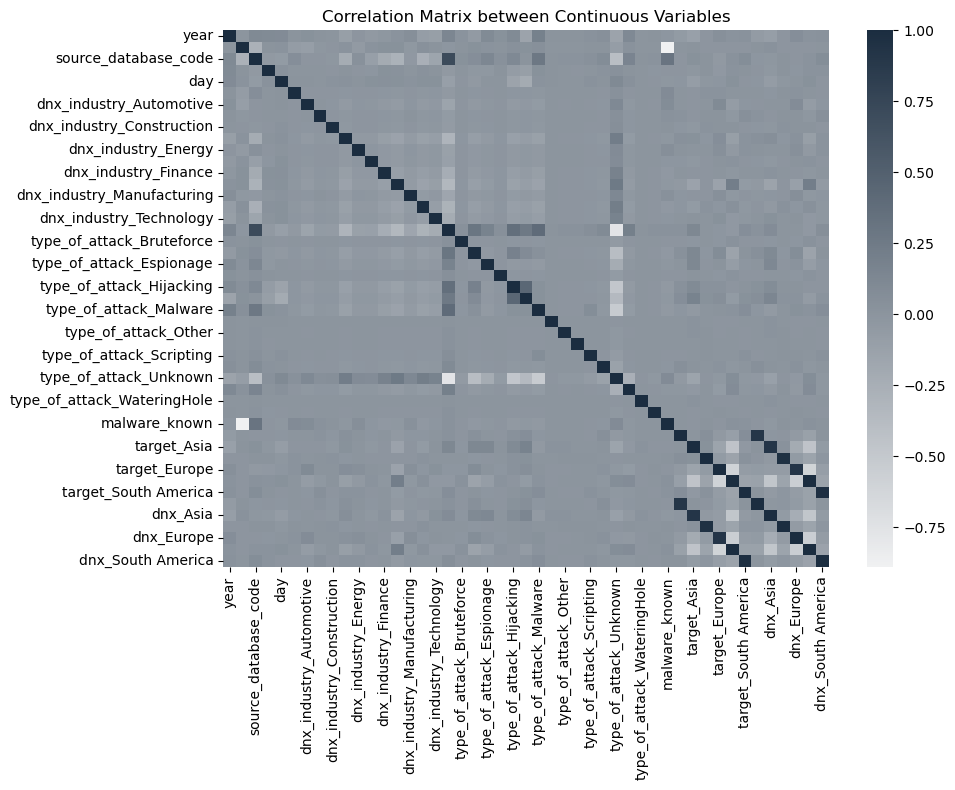

In [463]:
correlation_matrix = df_1.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap=denexus_palette, fmt=".2f")
plt.title('Correlation Matrix between Continuous Variables')
plt.tight_layout()
plt.show()

### División en Conjuntos de Entrenamiento y Prueba.

In [464]:
X = df_1.drop(['type_of_attack_Malware'], axis=1)
y = df_1['type_of_attack_Malware']

In [465]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=42)

In [466]:
y_train.value_counts()

0    17298
1     2102
Name: type_of_attack_Malware, dtype: int64

In [467]:
y_test.value_counts()

0    4366
1     485
Name: type_of_attack_Malware, dtype: int64

### Entrenamiento y Evaluación de Modelos.

#### **Random Forest.**

In [468]:
rf_model = RandomForestClassifier(
                                  random_state=42,
                                  n_estimators=100,
                                  min_samples_split=5)
rf_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=5, random_state=42)

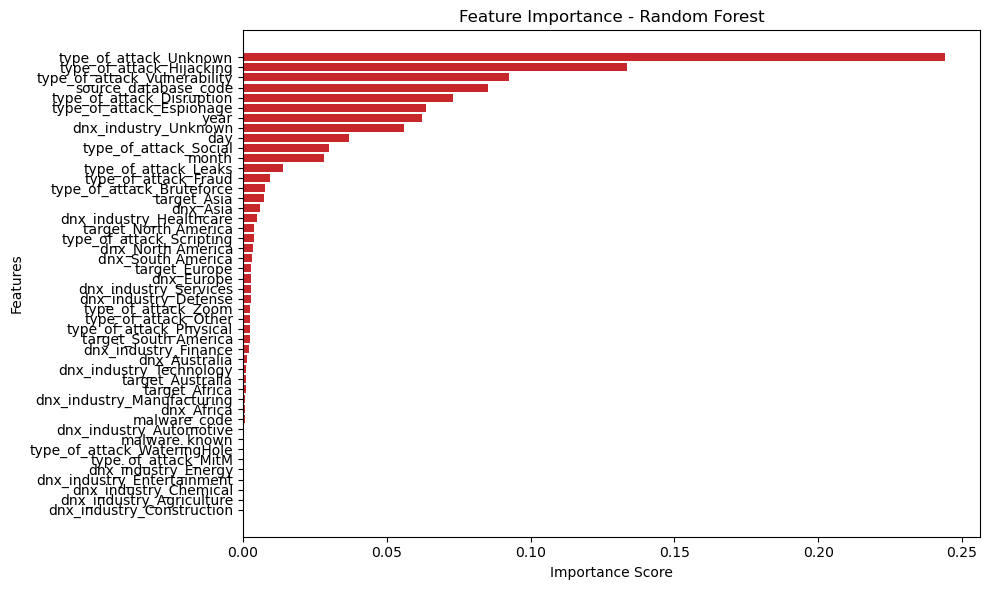

In [469]:
feature_importances = rf_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], align='center', color=denexus_colors[2])
plt.gca().invert_yaxis()
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
# Guardar el gráfico en la carpeta 'plots'.
output_dir = "plots"
if os.path.exists(output_dir) and os.path.isdir(output_dir):
    output_path = os.path.join(output_dir, "feature-importance_random-forest.png")
    plt.savefig(output_path)
plt.show()

In [470]:
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
cv_scores

array([0.98505155, 0.98350515, 0.98969072, 0.98453608, 0.98917526])

In [471]:
print("Train set score (Accuracy) =", rf_model.score(X_train, y_train))
print("Test set score (Accuracy) =", rf_model.score(X_test, y_test))

conf_mat = confusion_matrix(y_test, rf_model.predict(X_test))

num_classes = conf_mat.shape[0]

print(tabulate(
    conf_mat,
    headers=[f'Pred Class {i}' for i in range(num_classes)],
    showindex=[f'Real Class {i}' for i in range(num_classes)],
    tablefmt='fancy_grid'
))

print("\nClassification Report:")
print(classification_report(y_test, rf_model.predict(X_test)))

Train set score (Accuracy) = 0.9960824742268041
Test set score (Accuracy) = 0.9859822716965574
╒══════════════╤════════════════╤════════════════╕
│              │   Pred Class 0 │   Pred Class 1 │
╞══════════════╪════════════════╪════════════════╡
│ Real Class 0 │           4335 │             31 │
├──────────────┼────────────────┼────────────────┤
│ Real Class 1 │             37 │            448 │
╘══════════════╧════════════════╧════════════════╛

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4366
           1       0.94      0.92      0.93       485

    accuracy                           0.99      4851
   macro avg       0.96      0.96      0.96      4851
weighted avg       0.99      0.99      0.99      4851



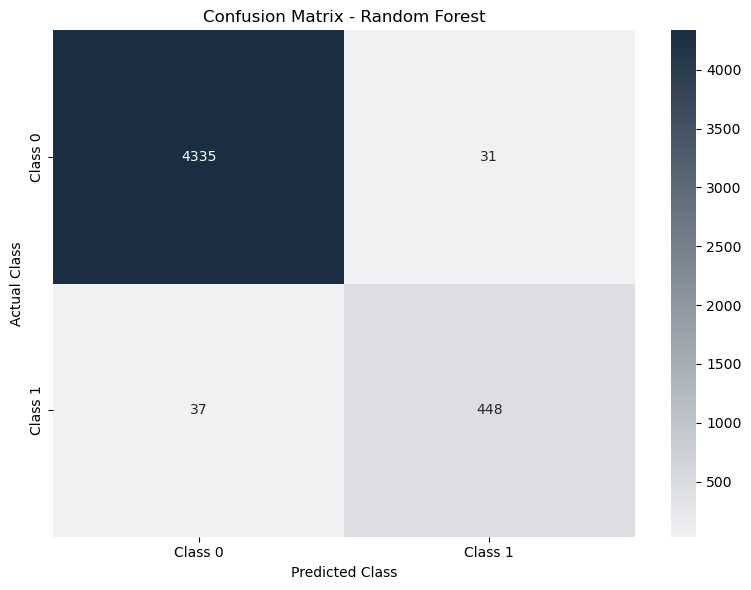

In [472]:
class_labels = [f'Class {i}' for i in range(conf_mat.shape[0])]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap=denexus_palette,
            xticklabels=class_labels, yticklabels=class_labels, cbar=True)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.tight_layout()
# Guardar el gráfico en la carpeta 'plots'.
output_dir = "plots"
if os.path.exists(output_dir) and os.path.isdir(output_dir):
    output_path = os.path.join(output_dir, "confusion-matrix_random-forest.png")
    plt.savefig(output_path)
plt.show()

#### **Decision Tree.**

In [473]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

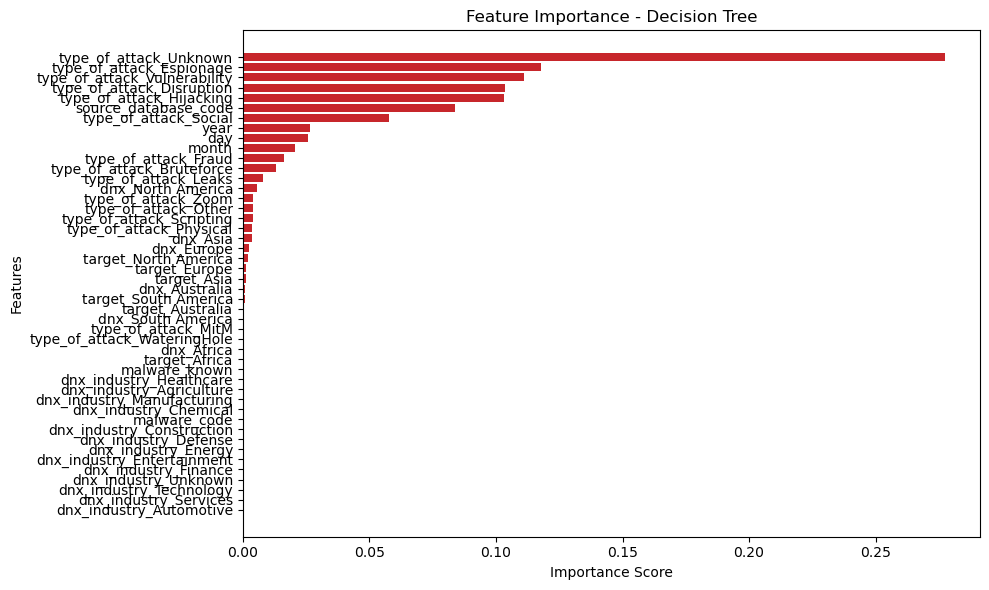

In [474]:
feature_importances = dt_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], align='center', color= denexus_colors[2])
plt.gca().invert_yaxis()
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance - Decision Tree')
plt.tight_layout()
# Guardar el gráfico en la carpeta 'plots'.
output_dir = "plots"
if os.path.exists(output_dir) and os.path.isdir(output_dir):
    output_path = os.path.join(output_dir, "feature-importance_decision-tree.png")
    plt.savefig(output_path)
plt.show()

In [475]:
cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')
cv_scores

array([0.98582474, 0.98402062, 0.98994845, 0.98092784, 0.98762887])

In [476]:
print("Train set score (Accuracy) =", dt_model.score(X_train, y_train))
print("Test set score (Accuracy) =", dt_model.score(X_test, y_test))

conf_mat = confusion_matrix(y_test, dt_model.predict(X_test))

num_classes = conf_mat.shape[0]

print(tabulate(
    conf_mat,
    headers=[f'Pred Class {i}' for i in range(num_classes)],
    showindex=[f'Real Class {i}' for i in range(num_classes)],
    tablefmt='fancy_grid'
))

print("\nClassification Report:")
print(classification_report(y_test, dt_model.predict(X_test)))

Train set score (Accuracy) = 0.998298969072165
Test set score (Accuracy) = 0.9853638425066996
╒══════════════╤════════════════╤════════════════╕
│              │   Pred Class 0 │   Pred Class 1 │
╞══════════════╪════════════════╪════════════════╡
│ Real Class 0 │           4327 │             39 │
├──────────────┼────────────────┼────────────────┤
│ Real Class 1 │             32 │            453 │
╘══════════════╧════════════════╧════════════════╛

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4366
           1       0.92      0.93      0.93       485

    accuracy                           0.99      4851
   macro avg       0.96      0.96      0.96      4851
weighted avg       0.99      0.99      0.99      4851



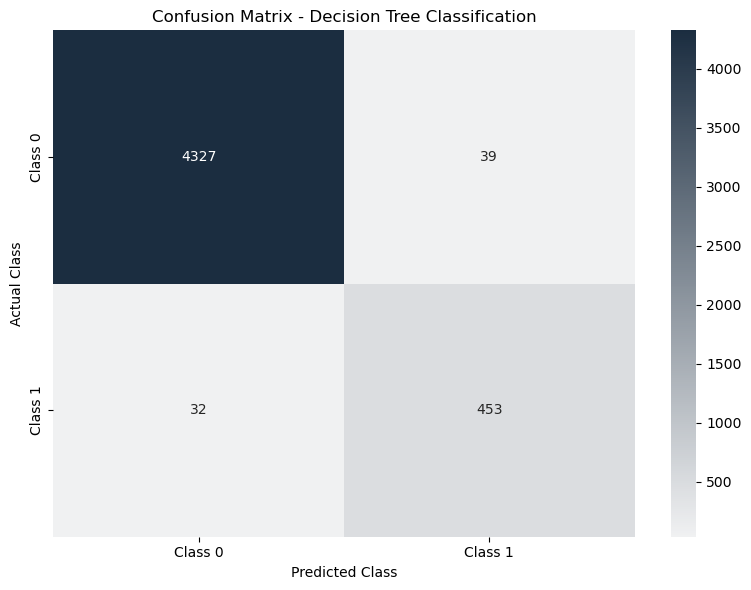

In [477]:
class_labels = [f'Class {i}' for i in range(conf_mat.shape[0])]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap=denexus_palette,
            xticklabels=class_labels, yticklabels=class_labels, cbar=True)
plt.title('Confusion Matrix - Decision Tree Classification')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.tight_layout()
# Guardar el gráfico en la carpeta 'plots'.
output_dir = "plots"
if os.path.exists(output_dir) and os.path.isdir(output_dir):
    output_path = os.path.join(output_dir, "confusion-matrix_decision-tree.png")
    plt.savefig(output_path)
plt.show()

### Curva ROC.
La curva **ROC** (Receiver Operating Characteristic) es una representación gráfica utilizada para evaluar el rendimiento de un modelo de clasificación binaria. Muestra la relación entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) a medida que varía el umbral de decisión del modelo.

Un modelo perfecto tendrá una curva que pase cerca del vértice superior izquierdo (FPR=0, TPR=1), indicando un rendimiento ideal. El área bajo la curva (AUC - Area Under the Curve) resume en un único valor qué tan bien el modelo discrimina entre las dos clases, donde un valor de 1 indica un modelo perfecto y 0.5 sugiere un rendimiento aleatorio.

In [478]:
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

In [479]:
# Calcular FPR, TPR y el AUC.
## Random Forest.
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

## Decision Tree.
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

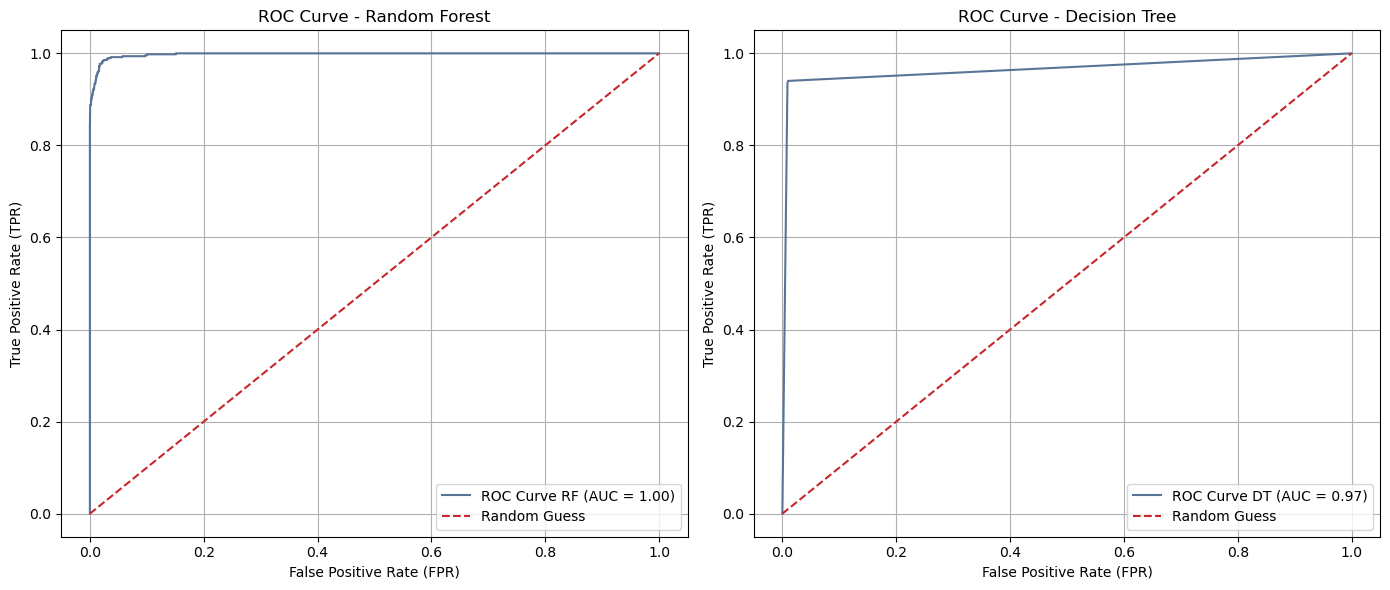

In [480]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

## Subplot para Random Forest.
axs[0].plot(fpr_rf, tpr_rf, label=f'ROC Curve RF (AUC = {roc_auc_rf:.2f})', color=denexus_colors[1])
axs[0].plot([0, 1], [0, 1], color=denexus_colors[2], linestyle='--', label='Random Guess')
axs[0].set_title('ROC Curve - Random Forest')
axs[0].set_xlabel('False Positive Rate (FPR)')
axs[0].set_ylabel('True Positive Rate (TPR)')
axs[0].legend(loc='lower right')
axs[0].grid(True)

## Subplot para Decision Tree.
axs[1].plot(fpr_dt, tpr_dt, color=denexus_colors[1], label=f'ROC Curve DT (AUC = {roc_auc_dt:.2f})')
axs[1].plot([0, 1], [0, 1], color=denexus_colors[2], linestyle='--', label='Random Guess')
axs[1].set_title('ROC Curve - Decision Tree')
axs[1].set_xlabel('False Positive Rate (FPR)')
axs[1].set_ylabel('True Positive Rate (TPR)')
axs[1].legend(loc='lower right')
axs[1].grid(True)

plt.tight_layout()
# Guardar el gráfico en la carpeta 'plots'.
output_dir = "plots"
if os.path.exists(output_dir) and os.path.isdir(output_dir):
    output_path = os.path.join(output_dir, "ROC-curve.png")
    plt.savefig(output_path)
plt.show()

### Resultados.

In [481]:
rf_pred = rf_model.predict(X_test)
dt_pred = dt_model.predict(X_test)

In [482]:
rf_precision = precision_score(y_test, rf_pred, average='weighted')
rf_recall = recall_score(y_test, rf_pred, average='weighted')

In [483]:
dt_precision = precision_score(y_test, dt_pred, average='weighted')
dt_recall = recall_score(y_test, dt_pred, average='weighted')

In [484]:
results['Model'] = ['RandomForest', 'DecisionTree']
results['Accuracy'] = [rf_precision, dt_precision]
results['Recall'] = [rf_recall, dt_recall]

In [485]:
results

,Model,Tipo,Accuracy,Recall
0,RandomForest,Binary,0.985913,0.985982
1,DecisionTree,Binary,0.985468,0.985364
